**About Dataset**


70000 records and 13 feature columns



Content<br>
The features are given below:<br>
Age | Objective Feature | age | int (days)<br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split



df=pd.read_csv("heart_data.csv")
df.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Adding Age , BMI and Hypertension column**

In [ ]:
#Converting age in days to age in yrs
df['age'] = np.floor(df['age'] / 365.25).astype(int)
#Creating BMI column using existing weight(Kg) and height(cm) column
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

def classify_blood_pressure(row):
    systolic = row['ap_hi']
    diastolic = row['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 0
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 1
    elif 130 <= systolic <= 139 or (80 <= diastolic <= 89):
        return 2
    elif 179 >= systolic >= 140 or 119 >= diastolic >= 90:
        return 3
    elif systolic >= 180 or diastolic >= 120:
        return 4

# adding hypertension column
df['Hypertension'] = df.apply(classify_blood_pressure, axis=1)
print(df.head(10))

   index  id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0   50       2     168    62.0    110     80            1     1   
1      1   1   55       1     156    85.0    140     90            3     1   
2      2   2   51       1     165    64.0    130     70            3     1   
3      3   3   48       2     169    82.0    150    100            1     1   
4      4   4   47       1     156    56.0    100     60            1     1   
5      5   8   59       1     151    67.0    120     80            2     2   
6      6   9   60       1     157    93.0    130     80            3     1   
7      7  12   61       2     178    95.0    130     90            3     3   
8      8  13   48       1     158    71.0    110     70            1     1   
9      9  14   54       1     164    68.0    110     60            1     1   

   smoke  alco  active  cardio        BMI  Hypertension  
0      0     0       1       0  21.967120             2  
1      0     0       1   

**Checking for any null values**

In [ ]:
print(df.isnull().sum())

index           0
id              0
age             0
gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
BMI             0
Hypertension    0
dtype: int64


**Checking for neg values and used interpolate the negative**

In [ ]:
def check_neg(column_to_check):
  negative_count = (df[column_to_check] < 0).sum()
  print("Count of negative values in column '{}': {}".format(column_to_check, negative_count))

for col in df.columns:
  check_neg(col)


#sorting the df acc to age
df.sort_values(by='age', ascending=True, inplace=True)

#interpolate the negative ap_lo and ap_high with previous person who has similar age
df['ap_lo'] = df['ap_lo'].mask(df['ap_lo'] < 0, other=pd.NA)
df['ap_hi'] = df['ap_hi'].mask(df['ap_hi'] < 0, other=pd.NA)

df['ap_lo'] = df.groupby('age')['ap_lo'].transform(lambda x: x.interpolate(method='nearest'))
df['ap_hi'] = df.groupby('age')['ap_hi'].transform(lambda x: x.interpolate(method='nearest'))


for col in df.columns:
  check_neg(col)

Count of negative values in column 'index': 0
Count of negative values in column 'id': 0
Count of negative values in column 'age': 0
Count of negative values in column 'gender': 0
Count of negative values in column 'height': 0
Count of negative values in column 'weight': 0
Count of negative values in column 'ap_hi': 7
Count of negative values in column 'ap_lo': 1
Count of negative values in column 'cholesterol': 0
Count of negative values in column 'gluc': 0
Count of negative values in column 'smoke': 0
Count of negative values in column 'alco': 0
Count of negative values in column 'active': 0
Count of negative values in column 'cardio': 0
Count of negative values in column 'BMI': 0
Count of negative values in column 'Hypertension': 0
Count of negative values in column 'index': 0
Count of negative values in column 'id': 0
Count of negative values in column 'age': 0
Count of negative values in column 'gender': 0
Count of negative values in column 'height': 0
Count of negative values in 

**Performing EDA**

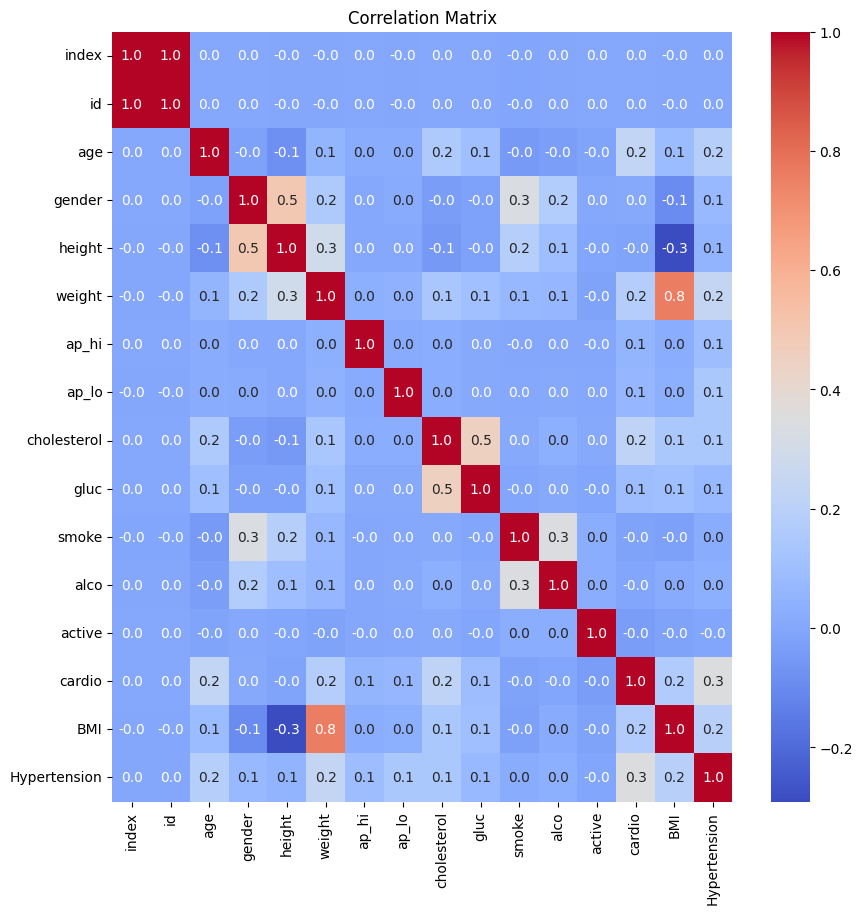

In [ ]:
#Creating correlation matrix to measure statistical dependence of each feature.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

**Key Insights:**


*  ap_hi and ap_lo (Blood Pressure): These two variables have a perfect correlation (1.0), because they both represent blood pressure readings. This suggest that including both may lead to redundancy in the model; so we have consider to combine them in some meaningful way.
*  weight and BMI: There’s a strong positive correlation (0.8), as BMI is directly calculated using weight and height. This shows that weight is a significant determinant of BMI.
*  cholesterol and gluc (Blood Glucose): There’s a moderate positive correlation (0.5), indicating that high cholesterol is often associated with higher blood glucose levels, which is consistent with known cardiovascular risk factors. Both of these could be important for predicting cardiovascular disease.
*  gender and height: There is a noticeable correlation between gender and height (0.5). This might be due to biological differences in average heights between genders but may not be directly relevant to cardiovascular disease prediction.
*  height and BMI: There is a weak negative correlation (-0.3) between height and BMI. This relationship suggests that, on average, taller individuals may have slightly lower BMI values for a given weight compared to shorter individuals. Although weak, this negative correlation reflects that height inversely affects BMI when weight remains constant.

<Axes: ylabel='count'>

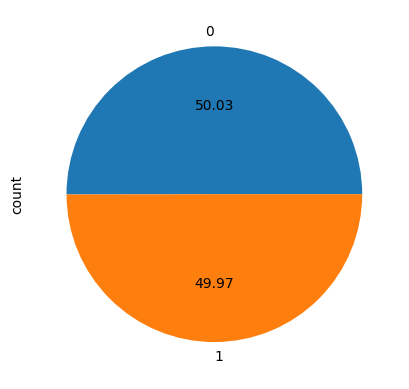

In [ ]:
df['cardio'].value_counts().plot(kind='pie',autopct='%.2f')

**Key Insights:**

With approximately 49.97% of individuals with cardiovascular conditions or high cardiovascular risk, indicates a fairly balanced distribution between those at risk and those not at risk.So this dataset has a  balanced target variable which can be advantageous in predictive modeling as it reduces the risk of bias toward one class over the other.

<Axes: ylabel='count'>

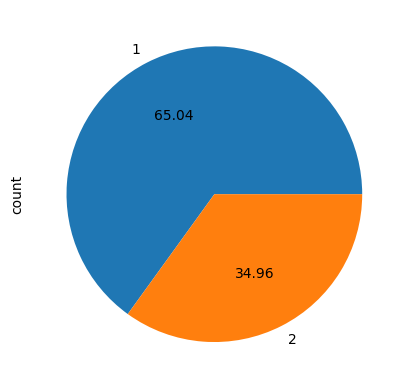

In [ ]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

**Key Insights:**

The above pie chart is a skewed gender distribution, with a significantly higher proportion of males. This skewed ratio can impact the interpretation of risk factors, as certain cardiovascular risk factors may differ. For instance, lifestyle or biological factors might make some features more relevant predictors for one gender compared to the other.

(array([4.0000e+00, 6.7230e+03, 1.4930e+04, 2.4622e+04, 2.3721e+04]),
 array([29., 36., 43., 50., 57., 64.]),
 <BarContainer object of 5 artists>)

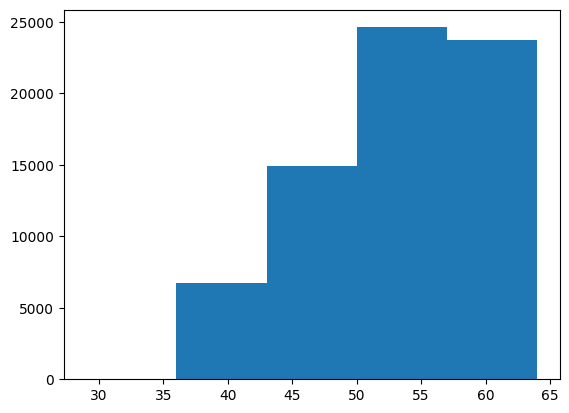

In [ ]:
plt.hist(df['age'],bins=5)

**Key Insight:**

This plot shows the distribution of ages (in years). It shows that most individuals in the dataset are in the age range of around 50 to 65, with a lower number of individuals in the younger age brackets. This suggests a dataset skewed towards older adults, which might be relevant for the analysis involves age-related health or lifestyle trends.

<ipython-input-9-7876107a0abe>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('age_group')['alco'].mean().reset_index()


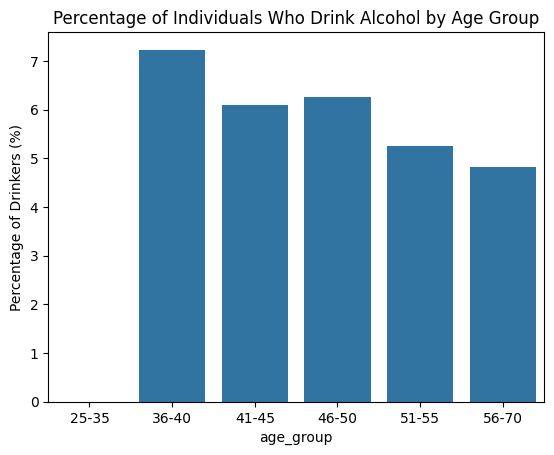

In [ ]:
bins = [25, 35, 40, 45, 50, 55, 70]
labels = ['25-35', '36-40', '41-45', '46-50', '51-55', '56-70']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of drinkers by age group
percentage_df = df.groupby('age_group')['alco'].mean().reset_index()
percentage_df['percentage'] = percentage_df['alco'] * 100  # Convert to percentage

# Plotting
sns.barplot(x='age_group', y='percentage', data=percentage_df)
plt.ylabel('Percentage of Drinkers (%)')
plt.title('Percentage of Individuals Who Drink Alcohol by Age Group')
plt.show()

**Insight:**

This bar chart shows that the highest percentage of alcohol consumption occurs in the 36-40 age group. After this peak, alcohol consumption percentage tends to decrease with age. This imply that middle-aged adults are more likely to consume alcohol than older age groups. Understanding this pattern can be valuable in studies related to alcohol's impact on health across different age ranges.

<ipython-input-10-423c2d996c58>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('age_group')['smoke'].mean().reset_index()


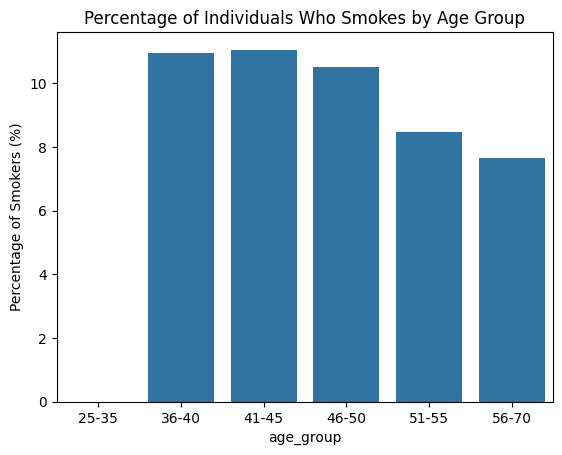

In [ ]:
# Calculate the percentage of smokers by age group
percentage_df = df.groupby('age_group')['smoke'].mean().reset_index()
percentage_df['percentage'] = percentage_df['smoke'] * 100  # Convert to percentage

# Plotting
sns.barplot(x='age_group', y='percentage', data=percentage_df)
plt.ylabel('Percentage of Smokers (%)')
plt.title('Percentage of Individuals Who Smokes by Age Group')
plt.show()

**Insight:**

 Individuals belonging to the age group 36-40 are constitute the highest percentage of smokers and alcohol drinkers. This is likely due to greater amount of stess levels that individuals at this age group are exposed to, which leads to them relying on external stimulants as stress relievers. Such individuals are at a risk for CVD in the next few years depending on the level of their consumption.

<ipython-input-11-b36789811b94>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('age_group')['cholesterol'].mean().reset_index()


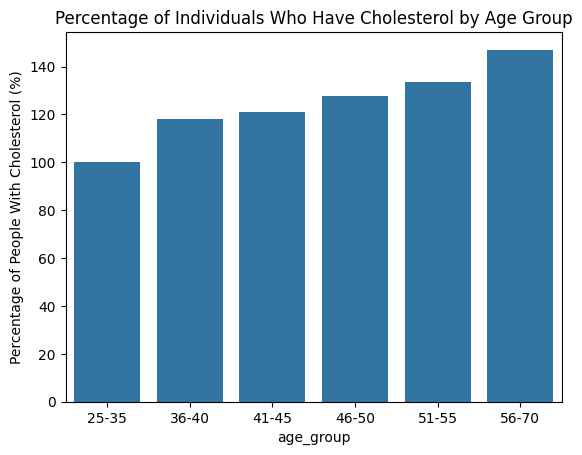

In [ ]:
# Calculate the percentage of Cholestrol by age group
percentage_df = df.groupby('age_group')['cholesterol'].mean().reset_index()
percentage_df['percentage'] = percentage_df['cholesterol'] * 100  # Convert to percentage

# Plotting
sns.barplot(x='age_group', y='percentage', data=percentage_df)
plt.ylabel('Percentage of People With Cholesterol (%)')
plt.title('Percentage of Individuals Who Have Cholesterol by Age Group')
plt.show()

**Insight:**

There is a steady increase in the cholestrol level of individuals as the age group is increasing, which ultimately increases their risk of getting CVD.

<ipython-input-12-cc65205821b1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('age_group')['active'].mean().reset_index()


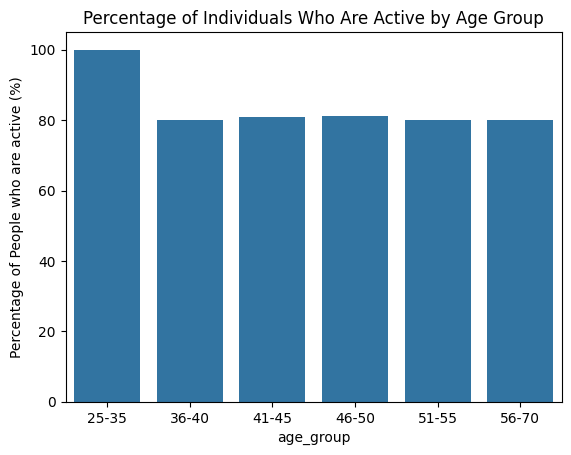

In [ ]:
# Calculate the percentage of drinkers by age group
percentage_df = df.groupby('age_group')['active'].mean().reset_index()
percentage_df['percentage'] = percentage_df['active'] * 100  # Convert to percentage

# Plotting
sns.barplot(x='age_group', y='percentage', data=percentage_df)
plt.ylabel('Percentage of People who are active (%)')
plt.title('Percentage of Individuals Who Are Active by Age Group')
plt.show()
df.drop(['age_group'], axis=1,inplace=True)

**Insight:**

It is observed that the younger generation, particularly the age group 25-35, is more active as compared to the older generations. This can also be one of the reasons why they are less likely to be affected by cardiovascular diseases at their age.

<Axes: xlabel='age', ylabel='Count'>

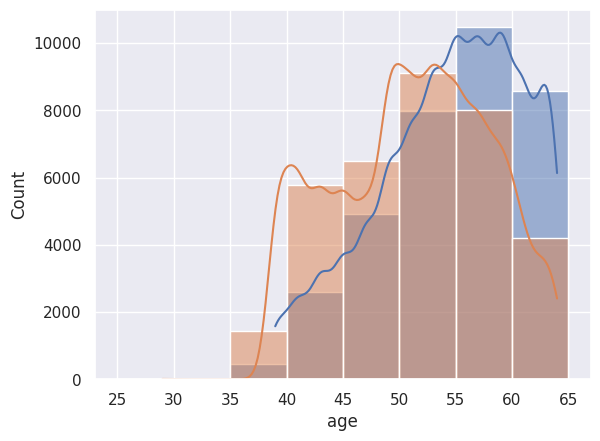

In [ ]:
sns.set_theme()
sns.histplot(df[df['cardio'] == 1]['age'], bins=range(25, 66, 5), kde=True) #Blue
sns.histplot(df[df['cardio'] == 0]['age'], bins=range(25, 66, 5), kde=True)  #Orange

**Insight:**

The KDE line smooths out the distribution and gives a visual representation of the underlying probability density function of the age distribution.It helps to get the overall trend of age distribution.

Interpretation:
Since the bar for the age range 55-60 is the tallest, we can conclude that the highest number of individuals with the cardio condition falls within that age range,the model might show bias towards predicting positive outcomes (i.e., cardiovascular disease) for individuals within this age group. This could make the model less accurate for other age ranges unless the dataset is properly balanced or other features are given more importance.

So we should handle potential bias due to age dominance and ensure that the model considers other relevant features to make accurate predictions across all age groups.


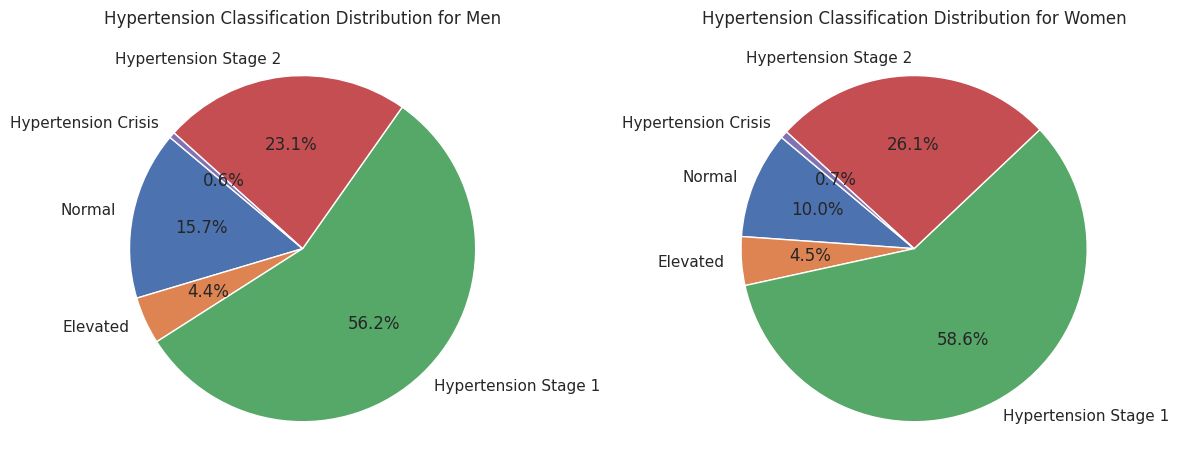

In [ ]:
#Pie charts for visualzing various stages of hypertension across both genders
hypertension_counts = df.groupby(['gender', 'Hypertension']).size().unstack()

plt.figure(figsize=(12, 6))

# Creating a pie chart for each gender
for i, gender in enumerate(hypertension_counts.index):
    gender_label = "Women" if gender == 2 else "Men"
    plt.subplot(1, 2, i + 1)
    plt.pie(hypertension_counts.loc[gender], labels=['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2','Hypertension Crisis'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Hypertension Classification Distribution for {gender_label}')

plt.tight_layout()
plt.show()

**Insight:**

According to the pie charts, we can conclude that women have greater percentage of Hypertension Stage 1 cases as compared to men. They also have more Hypertnesion Stage 2 cases as compared to men. This increases their chances of getting cardiovascular diseases by a narrow margin.

<ipython-input-15-2698ece487d4>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_distribution = df.groupby(['age_group', 'gender', 'Hypertension']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

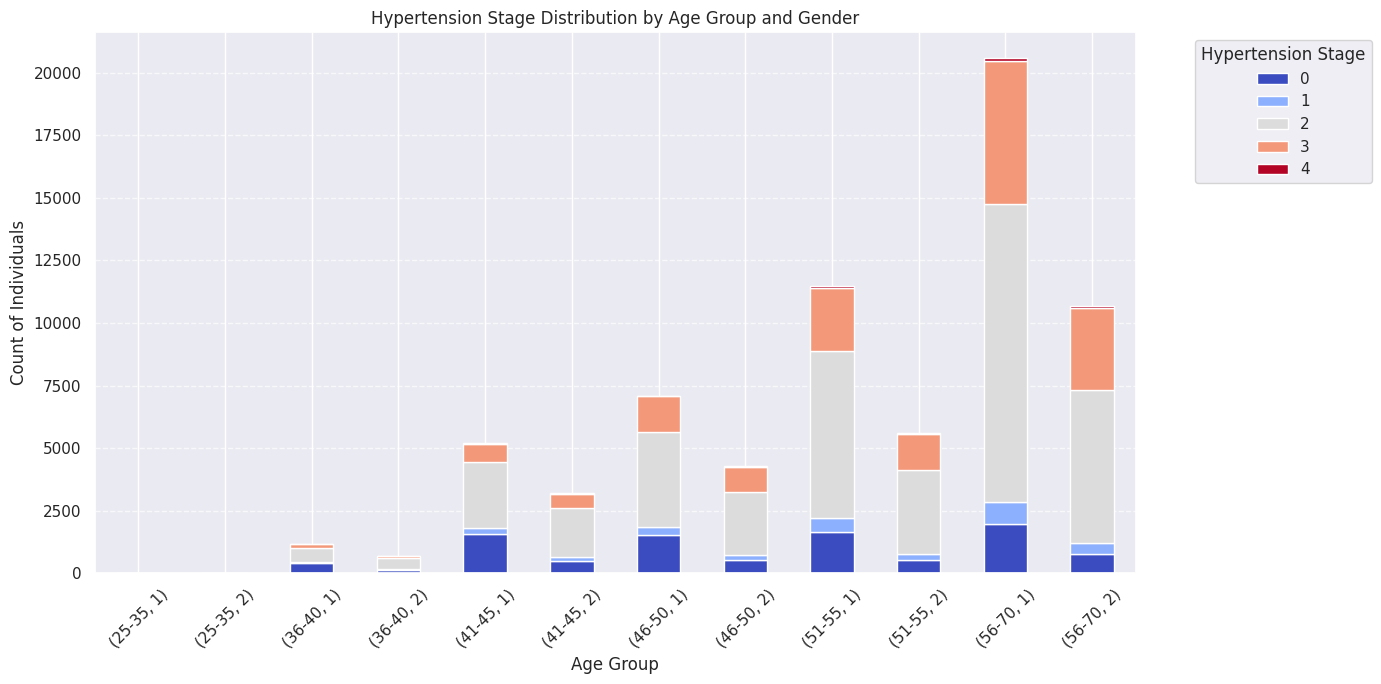

In [ ]:
bins = [25, 35, 40, 45, 50, 55, 70]
labels = ['25-35', '36-40', '41-45', '46-50', '51-55', '56-70']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

hypertension_distribution = df.groupby(['age_group', 'gender', 'Hypertension']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
hypertension_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 7))

plt.title('Hypertension Stage Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count of Individuals')
plt.legend(title='Hypertension Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df.drop(['age_group'],axis=1,inplace=True)

**Insight:**


The prevalence of hypertension increases with age. This is evident from the increasing height of the stacked bars as we move from younger to older age groups.
The number of individuals in the normal category decreases with age, while the number in the elevated and hypertension stages increases.
In the younger age groups (25-35, 36-40), the majority are still in the normal category.
Starting from the 41-45 age group, we see a significant increase in the number of individuals in the elevated and hypertension stages.
The 56-70 age group has the highest number of individuals in the hypertension stage 2 category.

The increasing prevalence of hypertension with age could be due to various factors like lifestyle changes (e.g., diet, exercise), genetic predisposition, and age-related physiological changes.

**Dectecting the Outlier and Calculating their accuracy score**

Using the describe() to get summary of statistics such as the mean, median, minimum, and maximum values, along with quartiles (25th and 75th percentiles)which could help us spot extreme values that indicate outliers.

Using boxplot visually to get data distribution through quartiles and highlights potential outliers as points outside the "whiskers". This quick visualization helps identify outliers at a glance.

In [ ]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Hypertension
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,52.803257,1.349571,164.359229,74.205690,128.842157,96.632843,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513,1.934429
std,20207.403759,28851.302323,6.762462,0.476838,8.210126,14.395757,153.991179,188.471478,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511,0.924615
min,0.000000,0.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000
25%,17499.750000,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,2.000000
50%,34999.500000,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068,2.000000
75%,52499.250000,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,2.000000
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,4.000000


<Axes: ylabel='age'>

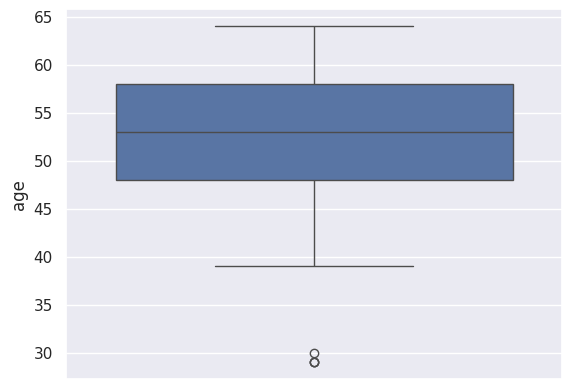

In [ ]:
sns.boxplot(df['age'])

<Axes: ylabel='height'>

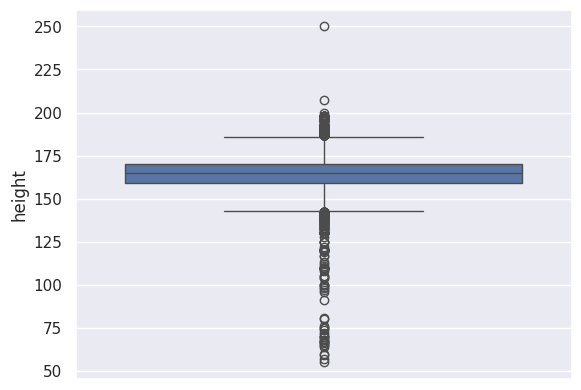

In [ ]:
sns.boxplot(df['height'])

<Axes: ylabel='weight'>

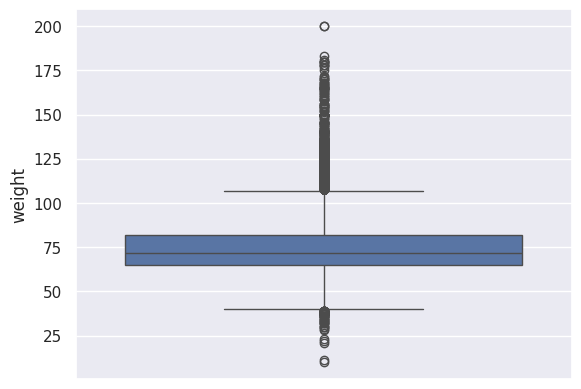

In [ ]:
sns.boxplot(df['weight'])

<Axes: ylabel='BMI'>

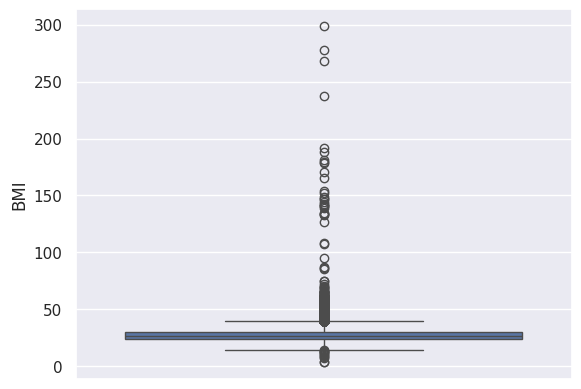

In [ ]:
sns.boxplot(df['BMI'])

**Z-scoring Technique:**

z-scores can help identify extreme measurements (e.g., unusually high cholesterol or blood pressure readings) that may skew results if left untreated. By detecting these outliers, we can decide whether to retain, modify, or remove them, depending on their relevance with our analysis.








In [ ]:
# Checking for outliers in specific columns using the Z-score method.
column=['age','height','weight','ap_lo','ap_hi','BMI']
# Calculate boundary values (using Z-score):
# For each column, it calculates the mean (average) and standard deviation (a measure of spread).
# The highest and lowest boundaries are based on the Z-score method.
# In a normal distribution, about 99.7% of the data falls within ±3 standard deviations from the mean, so values outside this range are considered outliers.
for cols in column:
    print(f"\n{cols}:")
    # Finding the boundary values
    high=df[cols].mean() + 3*df[cols].std();
    low=df[cols].mean() - 3*df[cols].std()
    print("Highest allowed",high)
    print("Lowest allowed",low)
    # Finding the outliers
    print(df[(df[cols] > high) | (df[cols] < low)])


age:
Highest allowed 73.09064227828898
Lowest allowed 32.5158720074253
       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
6219    6219   8850   29       1     175    59.0  120.0   80.0            1   
22343  22343  31922   29       2     175    92.0  100.0   60.0            1   
30666  30666  43842   29       1     159    59.0  120.0   80.0            1   
55905  55905  79749   30       1     160    59.0  110.0   70.0            1   

       gluc  smoke  alco  active  cardio        BMI  Hypertension  
6219      1      0     0       1       0  19.265306             2  
22343     1      0     0       1       0  30.040816             0  
30666     1      0     0       1       0  23.337684             2  
55905     1      0     0       1       0  23.046875             0  

height:
Highest allowed 188.98960766504325
Lowest allowed 139.72884947781387
       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
36642  36642  52361   39       2   

**Accuracy score after removing the outlier('weight','ap_lo','ap_hi') using z-score**

In [ ]:
column=['weight','ap_lo','ap_hi']
zscore_df=df
#Filter Out Outliers, keeping only the rows where values in the column are within the high and low bounds (i.e., not outliers).
# The resulting dataset, new_df, has outliers removed for the selected columns.
for cols in column:
    # Finding the boundary values
    high=zscore_df[cols].mean() + 3*zscore_df[cols].std();
    low=zscore_df[cols].mean() - 3*zscore_df[cols].std()
    # Triming the outliers
    zscore_df = zscore_df[(zscore_df[cols] < high) & (zscore_df[cols] > low)]
print(zscore_df.head(5))

# Creating two separate train-test splits for two versions of the dataset:
# Original Dataset (df):Splits df into X_train, X_test, y_train, and y_test, where X contains features (everything except the cardio column) and y is the target variable (cardio column).
# Outlier-Removed Dataset (zscore_df):Splits new_df into X_train_scaled, X_test_scaled, y_train_scaled, and y_test_scaled, following the same format as the original dataset split.
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1),
                                                    df['cardio'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train_no_outlier , X_test_no_outlier,y_train_no_outlier,y_test_no_outlier =train_test_split(zscore_df.drop('cardio', axis=1),
                                                    zscore_df['cardio'],
                                                    test_size=0.2,
                                                    random_state=42)
lr = LogisticRegression()
lr_no_outlier = LogisticRegression()
# Fit the models
lr.fit(X_train, y_train)
lr_no_outlier.fit(X_train_no_outlier, y_train_no_outlier)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_no_outlier = lr_no_outlier.predict(X_test_no_outlier)

# Evaluate if removing outliers (using Z-scoring) improves the model’s accuracy in predicting the target variable (cardio).
print("Actual Accuracy:", accuracy_score(y_test, y_pred))
print("Zscoring Accuracy:", accuracy_score(y_test_no_outlier, y_pred_no_outlier))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fit the models
lr.fit(X_train, y_train)
lr_no_outlier.fit(X_train_no_outlier, y_train_no_outlier)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_no_outlier = lr_no_outlier.predict(X_test_no_outlier)

# # Evaluate if removing outliers (using Z-scoring) improves the model’s accuracy in predicting the target variable (cardio).
accuracy = accuracy_score(y_test, y_pred)
accuracy_no_outlier = accuracy_score(y_test_no_outlier, y_pred_no_outlier)

# # Print the evaluation metrics for the original dataset
# print("Original Dataset (with outliers):")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision_score(y_test, y_pred):.4f}")
# print(f"Recall: {recall_score(y_test, y_pred):.4f}")
# print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# # Confusion Matrix for original dataset
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix (Original Dataset):")
# print(conf_matrix)

# Print the evaluation metrics for the outlier-removed dataset
print("\nOutlier-Removed Dataset (Z-scoring):")
print(f"Accuracy: {accuracy_no_outlier:.4f}")
print(f"Precision: {precision_score(y_test_no_outlier, y_pred_no_outlier):.4f}")
print(f"Recall: {recall_score(y_test_no_outlier, y_pred_no_outlier):.4f}")
print(f"F1 Score: {f1_score(y_test_no_outlier, y_pred_no_outlier):.4f}")

# Confusion Matrix for outlier-removed dataset
conf_matrix_no_outlier = confusion_matrix(y_test_no_outlier, y_pred_no_outlier)
print("Confusion Matrix (Outlier-Removed Dataset):")
print(conf_matrix_no_outlier)


       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
6219    6219   8850   29       1     175    59.0  120.0   80.0            1   
22343  22343  31922   29       2     175    92.0  100.0   60.0            1   
30666  30666  43842   29       1     159    59.0  120.0   80.0            1   
55905  55905  79749   30       1     160    59.0  110.0   70.0            1   
47373  47373  67661   39       1     168    61.0  100.0   80.0            1   

       gluc  smoke  alco  active  cardio        BMI  Hypertension  
6219      1      0     0       1       0  19.265306             2  
22343     1      0     0       1       0  30.040816             0  
30666     1      0     0       1       0  23.337684             2  
55905     1      0     0       1       0  23.046875             0  
47373     1      0     0       1       0  21.612812             2  


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Actual Accuracy: 0.6895
Zscoring Accuracy: 0.7098331870061457


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Outlier-Removed Dataset (Z-scoring):
Accuracy: 0.7098
Precision: 0.7299
Recall: 0.6590
F1 Score: 0.6927
Confusion Matrix (Outlier-Removed Dataset):
[[5233 1654]
 [2312 4469]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**Insight:**

The above metrics has relatively good precision (73%) and accuracy (~71%), suggesting it does well at predicting the absence of cardiovascular disease and avoids false positives to some extent.The F1-Score of 0.6927 shows that the model balances precision and recall reasonably well.But performance on the false negative rate needs attention.

This slight increase in accuracy indicate that the model generalize better on the test data. By filtering out extreme values that could distort the analysis, the model can focus on patterns that are more representative of the majority of data points.

**Comparison:**

Both IQR and Zscoring techniques improve upon the actual accuracy, but Zscoring shows a more significant boost.
IQR provides a modest improvement, indicating it may be effective for certain types of data distributions or outlier management.Zscoring, however, appears to be more effective in optimizing the model's performance, likely due to its ability to standardize features, making them comparable and improving convergence during model training.

Both techniques have merit, but Zscoring offers a more substantial enhancement to the model's accuracy

**Scaling using dataset without outliers(weight,ap_lo,ap_hi)**

In [ ]:
X_train_no_outlier , X_test_no_outlier,y_train_no_outlier,y_test_no_outlier =train_test_split(zscore_df.drop('cardio', axis=1),
                                                    zscore_df['cardio'],
                                                    test_size=0.2,
                                                    random_state=42)

# fit the scaler to the train set, it will learn the parameters
scaler = StandardScaler()
scaler.fit(X_train_no_outlier)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_no_outlier)
X_test_scaled = scaler.transform(X_test_no_outlier)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_no_outlier.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_no_outlier.columns)
np.round(X_train_no_outlier .describe(), 1)
np.round(X_train_scaled.describe(), 1)

lr = LogisticRegression()
lr_scaled = LogisticRegression()
# Fit the models
lr.fit(X_train_no_outlier ,y_train_no_outlier)
lr_scaled.fit(X_train_scaled, y_train_no_outlier)

# Make predictions
y_pred_no_outlier = lr.predict(X_test_no_outlier )
y_pred_scaled = lr_scaled.predict(X_test_scaled)

# Evaluate accuracy
print("Actual Accuracy without outlier:", accuracy_score(y_test_no_outlier, y_pred_no_outlier ))
print("Scaled Accuracy without outlier:", accuracy_score(y_test_no_outlier, y_pred_scaled))

precision = precision_score(y_test_no_outlier, y_pred_scaled)
recall = recall_score(y_test_no_outlier, y_pred_scaled)
f1 = f1_score(y_test_no_outlier, y_pred_scaled)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test_no_outlier, y_pred_scaled)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Actual Accuracy without outlier: 0.7098331870061457
Scaled Accuracy without outlier: 0.7254170324846356
Precision: 0.7522
Recall: 0.6660
F1 Score: 0.7065
Confusion Matrix:
[[5399 1488]
 [2265 4516]]


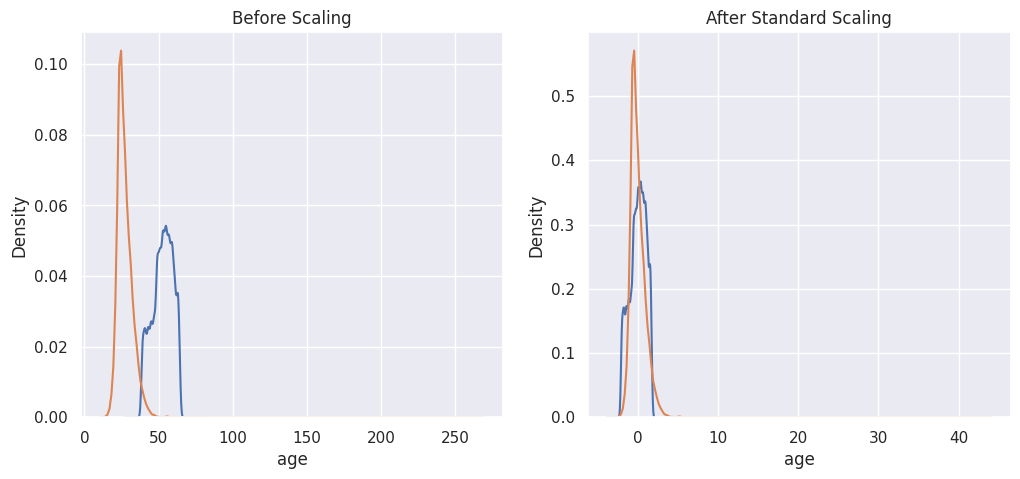

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_no_outlier['age'], ax=ax1)
sns.kdeplot(X_train_no_outlier['BMI'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['BMI'], ax=ax2)
plt.show()

**Insight:**

We see density plots for both age and BMI before and after scaling.

Before Scaling:
In the left plot, the age and BMI features are on vastly different scales. The age distribution has a wider range (spanning from around 0 to over 250), while the BMI values are much lower, with density heavily concentrated in a smaller range. This discrepancy in scale can make it challenging for machine learning algorithms, especially those sensitive to feature magnitudes, to effectively learn patterns.

After Standard Scaling:
In the right plot , both age and BMI are transformed to a similar scale using standard scaling, which centers the data around zero and scales it based on the standard deviation. Now, the distributions for age and BMI are more comparable in terms of scale, which can help improve the performance of models by preventing one feature from disproportionately influencing the results.



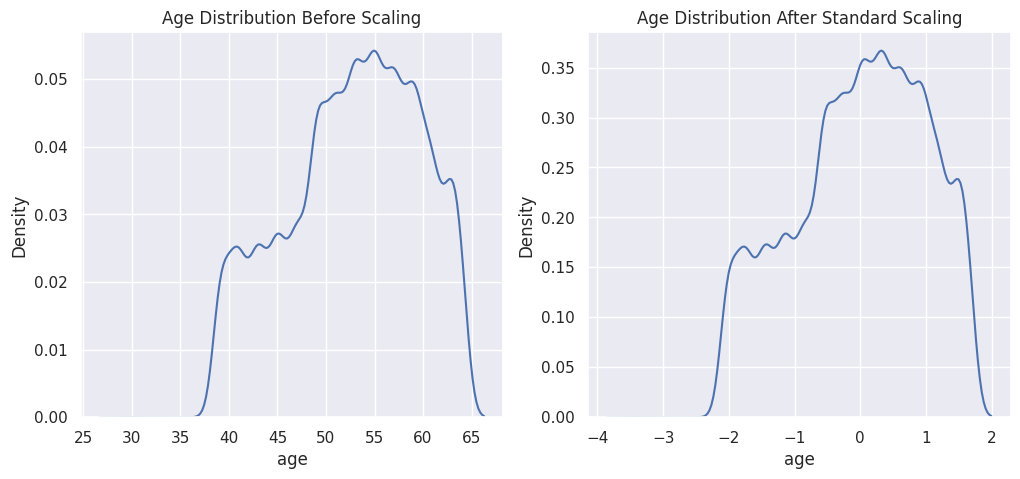

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train_no_outlier['age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
plt.show()

**Insight:**

The plots shows age distribution before and after standard scaling, with clearer density lines and zoomed-in ranges.

Before Scaling: We see a roughly normal distribution centered between 45 and 60, which likely represents a typical age range in the dataset. However, it lacks standardization, meaning it still retains its original scale and range.

After Scaling: The transformation centers the age values around 0, with most data points within a range of -3 to 2. This scaled distribution aligns well with the StandardScaler's target distribution, making it easier for algorithms to weigh the feature proportionally. By eliminating varying scales, we allow models to process age similarly to other features in terms of weight.

**Random Forest Classifier:**

It provides a convenient way to assess feature importance based on how well each feature contributes to decision-making within the model.
By examining feature importance, we can reduce the dimensionality in our dataset by selecting only the most influential features, which can lead to improved model efficiency and interpretability.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#RFC on  dataset without outliers(weight,ap_lo,ap_hi)
X_train, X_test, y_train, y_test = train_test_split(zscore_df.drop(columns=['cardio','index','id'], axis=1),zscore_df['cardio'],test_size=0.2,random_state=42)
X_train.shape, X_test.shape

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc.feature_importances_})

import plotly.express as px
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Importance of each Feature')
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#RFC on Scaling using dataset without outliers(weight,ap_lo,ap_hi)
X_train, X_test, y_train, y_test = train_test_split(zscore_df.drop(columns=['cardio','index','id'], axis=1),zscore_df['cardio'],test_size=0.2,random_state=42)
X_train.shape, X_test.shape
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rfc.feature_importances_})

import plotly.express as px
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Importance of each Feature')
fig.show()

From above observation v could see that RFC is not sensitive to feature scaling. Outlier removal enhance the robustness of other models but is less critical for RFC.

**Analysis:**

The most important features according to RFC are:


*  BMI is the top predictor due to its association with cardiovascular health issues like hypertension, diabetes, and metabolic syndrome.
*   Age is another critical feature, as it is naturally linked to the risk of cardiovascular issues due to cumulative health factors.
*  Cholesterol and  Hypertension have some predictive power but contribute less compared to the top predictors.

**TensorFlow after removing all the anamolies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import L2



df=pd.read_csv("heart_data.csv")
df.head(5)
#Converting age in days to age in yrs
df['age'] = np.floor(df['age'] / 365.25).astype(int)
#Creating BMI column using existing weight(Kg) and height(cm) column
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

#sorting the df acc to age
df.sort_values(by='age', ascending=True, inplace=True)

#interpolate the negative ap_lo and ap_high with previous person who has similar age
df['ap_lo'] = df['ap_lo'].mask(df['ap_lo'] < 0, other=pd.NA)
df['ap_hi'] = df['ap_hi'].mask(df['ap_hi'] < 0, other=pd.NA)

df['ap_lo'] = df.groupby('age')['ap_lo'].transform(lambda x: x.interpolate(method='nearest'))
df['ap_hi'] = df.groupby('age')['ap_hi'].transform(lambda x: x.interpolate(method='nearest'))

column=['weight','ap_lo','ap_hi']
zscore_df=df
#Filter Out Outliers, keeping only the rows where values in the column are within the high and low bounds (i.e., not outliers).
# The resulting dataset, new_df, has outliers removed for the selected columns.
for cols in column:
    # Finding the boundary values
    high=zscore_df[cols].mean() + 3*zscore_df[cols].std()
    low=zscore_df[cols].mean() - 3*zscore_df[cols].std()
    # Triming the outliers
    zscore_df = zscore_df[(zscore_df[cols] < high) & (zscore_df[cols] > low)]
print(zscore_df.head(5))

# Creating two separate train-test splits for two versions of the dataset:
# Original Dataset (df):Splits df into X_train, X_test, y_train, and y_test, where X contains features (everything except the cardio column) and y is the target variable (cardio column).
# Outlier-Removed Dataset (zscore_df):Splits new_df into X_train_scaled, X_test_scaled, y_train_scaled, and y_test_scaled, following the same format as the original dataset split.
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1),
                                                    df['cardio'],
                                                    test_size=0.2,
                                                    random_state=42)
X_train_no_outlier , X_test_no_outlier,y_train_no_outlier,y_test_no_outlier =train_test_split(zscore_df.drop('cardio', axis=1),
                                                    zscore_df['cardio'],
                                                    test_size=0.2,
                                                    random_state=42)

# Assuming zscore_df is your preprocessed DataFrame with the necessary columns.
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    zscore_df.drop(columns=['cardio', 'index', 'id','smoke','alco'], axis=1),
    zscore_df['cardio'],
    test_size=0.2,
    random_state=42
)

# Standardize the feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=L2(0.05),input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer=L2(0.05)),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
y_train = y_train.values
y_test = y_test.values
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions and convert them to binary
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_binary)
print("Confusion Matrix:")
print(conf_matrix)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

X_scaled = scaler.transform(zscore_df.drop(columns=['cardio', 'index', 'id','smoke','alco'], axis=1))
predictions = model.predict(X_scaled)

# Convert predictions to a flattened array
predictions_flat = predictions.flatten()

# Define outlier conditions based on your criteria
outliers = ((predictions_flat > 0.7) & (zscore_df['cardio'] == 0)) | ((predictions_flat < 0.3) & (zscore_df['cardio'] == 1))

filtered_indices = ~outliers
filtered_data = zscore_df[filtered_indices]

print(zscore_df[outliers].head(100).to_string())
print("Filtered Data Shape:", filtered_data.shape)

print(filtered_data[filtered_data['cardio'] == 1].shape)
print(filtered_data[filtered_data['cardio'] == 0].shape)

X_train, X_test, y_train, y_test = train_test_split(
    filtered_data.drop(columns=['cardio', 'index', 'id','smoke','alco'], axis=1),
    filtered_data['cardio'],
    test_size=0.2,
    random_state=42
)

# Standardize the feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu',kernel_regularizer=L2(0.05), input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer=L2(0.05)),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cw = {0: 1, 1: 1.5}
y_train = y_train.values
y_test = y_test.values
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, class_weight=cw, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions and convert them to binary
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions_binary)
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_binary)
print("Confusion Matrix:")
print(conf_matrix)

       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
6219    6219   8850   29       1     175    59.0  120.0   80.0            1   
22343  22343  31922   29       2     175    92.0  100.0   60.0            1   
30666  30666  43842   29       1     159    59.0  120.0   80.0            1   
55905  55905  79749   30       1     160    59.0  110.0   70.0            1   
47373  47373  67661   39       1     168    61.0  100.0   80.0            1   

       gluc  smoke  alco  active  cardio        BMI  
6219      1      0     0       1       0  19.265306  
22343     1      0     0       1       0  30.040816  
30666     1      0     0       1       0  23.337684  
55905     1      0     0       1       0  23.046875  
47373     1      0     0       1       0  21.612812  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7013 - loss: 1.4208 - val_accuracy: 0.7271 - val_loss: 0.5942
Epoch 2/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7182 - loss: 0.6020 - val_accuracy: 0.7275 - val_loss: 0.5903
Epoch 3/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7178 - loss: 0.5969 - val_accuracy: 0.7306 - val_loss: 0.5833
Epoch 4/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7183 - loss: 0.5915 - val_accuracy: 0.7310 - val_loss: 0.5823
Epoch 5/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7184 - loss: 0.5925 - val_accuracy: 0.7285 - val_loss: 0.5789
Epoch 6/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7208 - loss: 0.5874 - val_accuracy: 0.7290 - val_loss: 0.5774
Epoch 7/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7203 - loss: 0.5864 - val_accuracy: 0.7258 - val_loss: 0.5786
Epoch 8/10
1367/1367 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7173 - loss: 0.5859 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1247/1247 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7404 - loss: 1.5496 - val_accuracy: 0.7932 - val_loss: 0.4681
Epoch 2/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7796 - loss: 0.5641 - val_accuracy: 0.7862 - val_loss: 0.4707
Epoch 3/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7834 - loss: 0.5496 - val_accuracy: 0.7959 - val_loss: 0.4476
Epoch 4/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7843 - loss: 0.5464 - val_accuracy: 0.7929 - val_loss: 0.4463
Epoch 5/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7877 - loss: 0.5392 - val_accuracy: 0.7928 - val_loss: 0.4449
Epoch 6/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7819 - loss: 0.5394 - val_accuracy: 0.7911 - val_loss: 0.4516
Epoch 7/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7859 - loss: 0.5339 - val_accuracy: 0.7952 - val_loss: 0.4381
Epoch 8/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7848 - loss: 0.5330 - val_accurac

390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
ROC AUC Score: 0.8941


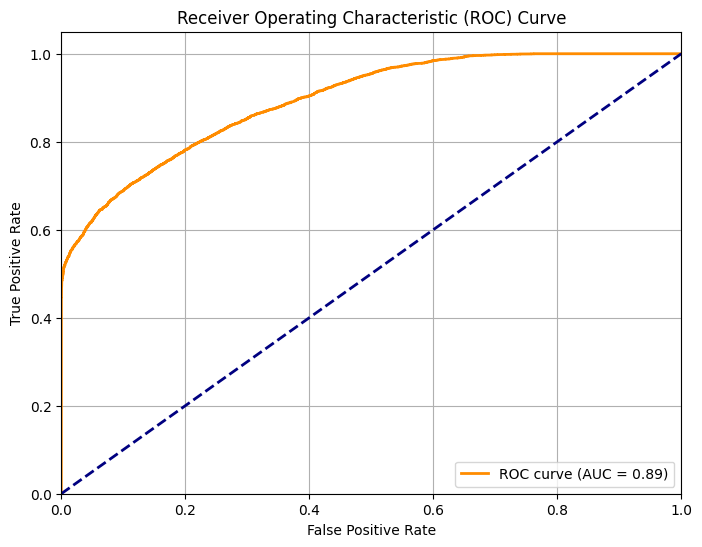

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities (not binary predictions) from the model
predictions_prob = model.predict(X_test_scaled)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print ROC score (AUC)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random model line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


AUC = 0.8941 means that the model is able to correctly distinguish between positive and negative cases (i.e., individuals with and without CVD risk) with a high degree of accuracy.

The AUC value reflects the model's true positive rate (TPR) and false positive rate (FPR) across all possible threshold values. An AUC of 0.8941 indicates that your model does a good job of identifying individuals with CVD (true positives) while minimizing false positives (incorrectly classifying a healthy person as being at risk).

# Class Weights

We can manually increase our by providing weights to the model such that it is penalized more for false negatives than false positives. in this case we give a 50% added penalty to the model for predicting a false negative compared to false positive. The weights were only applied to the filtered data model to preserve the balanced nature of the filtered model. The model can now reliably get 80-90% recall at the cost of lower precision